In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)  # for reproducibility

# 980 normal requests: 20–50 ms
normal_requests = np.random.randint(20, 51, size=980)

# 20 spike requests: 1000–5000 ms
spike_requests = np.random.randint(1000, 5001, size=20)

# Combine into one latency log
latency_logs = np.concatenate([normal_requests, spike_requests])

# Optional: shuffle to mimic real request order
np.random.shuffle(latency_logs)

latency_logs

array([  41,   26,   31,   31,   41,   26,   40,   45,   37,   24,   38,
         49,   47,   48,   25,   34,   22,   50,   49,   33,   47,   49,
         22,   48,   24,   40,   45,   20,   33,   44,   49,   30,   29,
         34,   43,   27,   21,   48,   43,   33,   49,   35,   27,   45,
         36,   23,   46,   20,   38,   35,   23,   38,   38,   31,   35,
         30,   47,   26,   40,   38,   24,   43,   32,   47,   29,   20,
         29,   45,   41,   43,   31,   29,   23,   22,   20,   24,   28,
         23,   35,   48,   29,   27,   36,   30,   26,   45,   45,   45,
         39, 1373,   24,   49,   38,   35,   38,   27,   44,   28,   49,
         31,   23,   46,   42,   40,   42,   28,   32,   20,   50,   45,
         49,   36,   23,   44,   38,   36,   23,   45,   31,   36,   31,
         49,   47,   32,   47,   50,   39,   20,   29,   47,   33, 4190,
         46,   25,   25,   27,   30,   22,   44,   38,   31,   35,   49,
         40,   26,   46,   47,   47, 2028,   33,   

In [3]:
def calculate_mad(data):
    """
    Calculate Median Absolute Deviation (MAD) from scratch using NumPy.
    """
    data = np.asarray(data)

    # Step 1: Compute the median
    median = np.median(data)

    # Step 2: Manual vector subtraction (absolute deviations)
    abs_deviations = np.abs(data - median)

    # Step 3: Median of absolute deviations
    mad = np.median(abs_deviations)

    return mad

In [4]:
def bayesian_audit(prior, sensitivity, specificity):
    """
    Calculates P(Cheater | Flagged) using Bayes' Rule
    """
    # True positives
    tp = sensitivity * prior

    # False positives
    fp = (1 - specificity) * (1 - prior)

    # Posterior probability
    posterior = tp / (tp + fp)

    return posterior


In [5]:
sensitivity = 0.98
specificity = 0.98

scenarios = {
    "Bootcamp (50%)": 0.50,
    "Econ Class (5%)": 0.05,
    "Honors Seminar (0.1%)": 0.001
}

for name, prior in scenarios.items():
    result = bayesian_audit(prior, sensitivity, specificity)
    print(f"{name}: P(Cheater | Flagged) = {result:.3%}")


Bootcamp (50%): P(Cheater | Flagged) = 98.000%
Econ Class (5%): P(Cheater | Flagged) = 72.059%
Honors Seminar (0.1%): P(Cheater | Flagged) = 4.676%


In [6]:
def chi_square_srm(observed, expected):
    """
    Manual Chi-Square Goodness-of-Fit Test for SRM detection
    """
    observed = np.array(observed)
    expected = np.array(expected)

    chi_square = np.sum((observed - expected) ** 2 / expected)
    return chi_square

In [7]:
observed = [50250, 49750]
expected = [50000, 50000]

chi2_stat = chi_square_srm(observed, expected)
chi2_stat

np.float64(2.5)

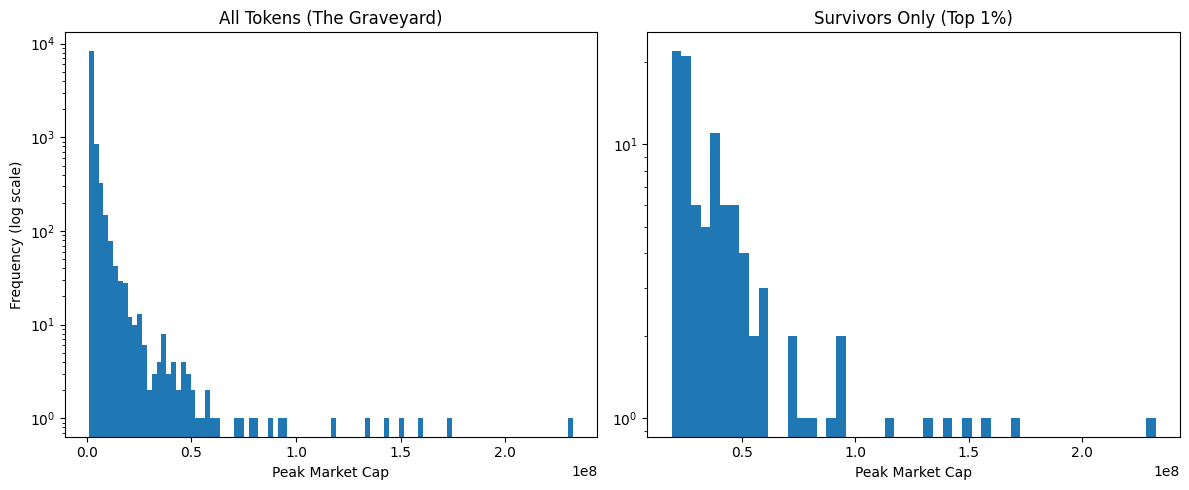

Mean Market Cap (All Tokens): $2,740,842.11
Mean Market Cap (Survivors Only): $44,633,521.22
Inflation Factor: 16.3×


In [8]:
# -----------------------------
# 1. Simulation parameters
# -----------------------------
np.random.seed(42)

n_tokens = 10_000
pareto_shape = 1.5   # heavy tail
scale_factor = 1e6  # scales market caps into realistic magnitudes

# -----------------------------
# 2. Generate peak market caps
# -----------------------------
# Pareto produces many small values and a few massive outliers
peak_market_caps = (
    np.random.pareto(pareto_shape, n_tokens) + 1
) * scale_factor

# -----------------------------
# 3. Create DataFrames
# -----------------------------
df_all = pd.DataFrame({
    "token_id": range(n_tokens),
    "peak_market_cap": peak_market_caps
})

# Survivors = top 1%
threshold = np.percentile(df_all["peak_market_cap"], 99)
df_survivors = df_all[df_all["peak_market_cap"] >= threshold]

# -----------------------------
# 4. Visualization
# -----------------------------
plt.figure(figsize=(12, 5))

# Graveyard histogram
plt.subplot(1, 2, 1)
plt.hist(df_all["peak_market_cap"], bins=100, log=True)
plt.title("All Tokens (The Graveyard)")
plt.xlabel("Peak Market Cap")
plt.ylabel("Frequency (log scale)")

# Survivors histogram
plt.subplot(1, 2, 2)
plt.hist(df_survivors["peak_market_cap"], bins=50, log=True)
plt.title("Survivors Only (Top 1%)")
plt.xlabel("Peak Market Cap")

plt.tight_layout()
plt.show()

# -----------------------------
# 5. Evaluation: Mean comparison
# -----------------------------
mean_all = df_all["peak_market_cap"].mean()
mean_survivors = df_survivors["peak_market_cap"].mean()

print(f"Mean Market Cap (All Tokens): ${mean_all:,.2f}")
print(f"Mean Market Cap (Survivors Only): ${mean_survivors:,.2f}")
print(f"Inflation Factor: {mean_survivors / mean_all:.1f}×")
